In [2]:
from IPython.display import Math
from IPython.display import Latex

import numpy as np
import os
import struct

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

----------------
----------------
----------------

## <font color='blue'>  Visualizing convergence. </font>

Experimenting to record in every epoch :

**a.** The test loss <br>
**b.** The training accuracy <br>
**c.** The test accuracy 

<br>




In [3]:
#Importing pytorch and torchvision
import torch
from torchvision import transforms
import torchvision

In [4]:
#this below import of SSL and subsequent command in the cell is to avoid errors encoutered due to SSL verification failure.
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    
for epoch in range(2):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(trainloader, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
        if i % 2000 == 1999:
            # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in testloader:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            outputs = net(images)
                
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))

#print('Finished Training')

[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.000
[2,  4000] loss: 0.000
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001


In [9]:
#a. The test loss  , b. The training accuracy  , c. The test accuracy 
print( " Train accuracy for each epoch is : ", train_accu)
print( " Train loss for each epoch is : ", train_losses)
print( " Test accuracy for each epoch is : ", test_accu)
print( " Test loss for each epoch is : ",test_losses)

 Train accuracy for each epoch is :  [36.688, 43.937]
 Train loss for each epoch is :  [1.4701321125030518, 0.36343082785606384]
 Test accuracy for each epoch is :  [46.53, 50.22]
 Test loss for each epoch is :  [1.0545397996902466, 1.2709048986434937]


In [10]:
running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    
for epoch in range(20):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(trainloader, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
        if i % 2000 == 1999:
            # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in testloader:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            outputs = net(images)
                
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))

#print('Finished Training')

[1,  2000] loss: 0.001
[1,  4000] loss: 0.000
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.001
[2,  6000] loss: 0.000
[2,  8000] loss: 0.000
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.001
[3,  4000] loss: 0.001
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.001
[3, 12000] loss: 0.000
[4,  2000] loss: 0.001
[4,  4000] loss: 0.000
[4,  6000] loss: 0.000
[4,  8000] loss: 0.001
[4, 10000] loss: 0.001
[4, 12000] loss: 0.001
[5,  2000] loss: 0.000
[5,  4000] loss: 0.001
[5,  6000] loss: 0.000
[5,  8000] loss: 0.000
[5, 10000] loss: 0.000
[5, 12000] loss: 0.000
[6,  2000] loss: 0.001
[6,  4000] loss: 0.001
[6,  6000] loss: 0.001
[6,  8000] loss: 0.001
[6, 10000] loss: 0.001
[6, 12000] loss: 0.000
[7,  2000] loss: 0.000
[7,  4000] loss: 0.000
[7,  6000] loss: 0.000
[7,  8000] loss: 0.001
[7, 10000] loss: 0.001
[7, 12000] loss: 0.001
[8,  2000] loss: 0.000
[8,  4000] 

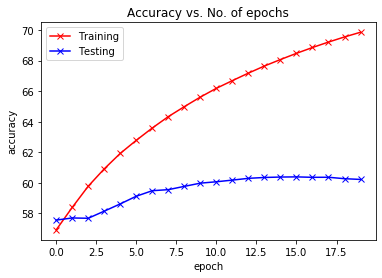

In [11]:
#d
import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

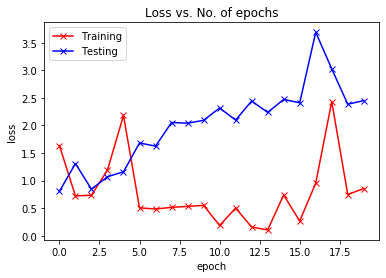

In [12]:
#d continues
Training_Loss = [x for x in train_losses]
Testing_Loss = [y for y in test_losses]
plt.plot(Training_Loss, '-rx')
plt.plot(Testing_Loss, '-bx')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training', 'Testing'])
plt.title('Loss vs. No. of epochs');

------------------------------
------------------------------
------------------------------

## <font color='blue'> Learning random labels. </font>

Instead of using the given input labels on the training set, use random labels. Then run for 40 epochs. 
<br>

**a.** Plots for the training accuracy. <br>
**b.** What is the final training accuracy? <br>
**c.** What would be the expected accuracy for a random baseline model?





In [15]:
# In this answer I am experimenting with both training and testing labels randomized. 
# I will repeat this with only training label randomized and testing label not randomized

running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    
for epoch in range(40):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(trainloader, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels=torch.randint(0, 9, (4,))
        
            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
        if i % 2000 == 1999:
            # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in testloader:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            outputs = net(images)
            labels=torch.randint(0, 9, (4,))     
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))


[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.001
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.001
[3,  4000] loss: 0.001
[3,  6000] loss: 0.001
[3,  8000] loss: 0.001
[3, 10000] loss: 0.001
[3, 12000] loss: 0.001
[4,  2000] loss: 0.001
[4,  4000] loss: 0.001
[4,  6000] loss: 0.001
[4,  8000] loss: 0.001
[4, 10000] loss: 0.001
[4, 12000] loss: 0.001
[5,  2000] loss: 0.001
[5,  4000] loss: 0.001
[5,  6000] loss: 0.001
[5,  8000] loss: 0.001
[5, 10000] loss: 0.001
[5, 12000] loss: 0.001
[6,  2000] loss: 0.001
[6,  4000] loss: 0.001
[6,  6000] loss: 0.001
[6,  8000] loss: 0.001
[6, 10000] loss: 0.001
[6, 12000] loss: 0.001
[7,  2000] loss: 0.001
[7,  4000] loss: 0.001
[7,  6000] loss: 0.001
[7,  8000] loss: 0.001
[7, 10000] loss: 0.001
[7, 12000] loss: 0.001
[8,  2000] loss: 0.001
[8,  4000] 

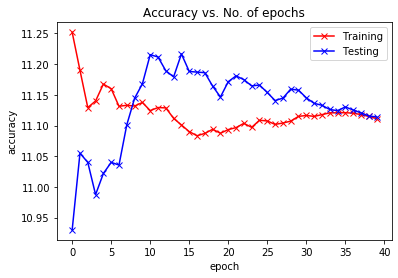

In [16]:
#a

import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [17]:
#b

print("Final training accuracy is : ",np.mean(train_accu) )

Final training accuracy is :  11.120514748078635


In [18]:
# This is experiment with only training label randomized and testing label not randomized

running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    
for epoch in range(40):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(trainloader, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels=torch.randint(0, 9, (4,))
        
            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
        if i % 2000 == 1999:
            # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in testloader:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            outputs = net(images)
            #labels=torch.randint(0, 9, (4,))     
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))


[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.001
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.001
[3,  4000] loss: 0.001
[3,  6000] loss: 0.001
[3,  8000] loss: 0.001
[3, 10000] loss: 0.001
[3, 12000] loss: 0.001
[4,  2000] loss: 0.001
[4,  4000] loss: 0.001
[4,  6000] loss: 0.001
[4,  8000] loss: 0.001
[4, 10000] loss: 0.001
[4, 12000] loss: 0.001
[5,  2000] loss: 0.001
[5,  4000] loss: 0.001
[5,  6000] loss: 0.001
[5,  8000] loss: 0.001
[5, 10000] loss: 0.001
[5, 12000] loss: 0.001
[6,  2000] loss: 0.001
[6,  4000] loss: 0.001
[6,  6000] loss: 0.001
[6,  8000] loss: 0.001
[6, 10000] loss: 0.001
[6, 12000] loss: 0.001
[7,  2000] loss: 0.001
[7,  4000] loss: 0.001
[7,  6000] loss: 0.001
[7,  8000] loss: 0.001
[7, 10000] loss: 0.001
[7, 12000] loss: 0.001
[8,  2000] loss: 0.001
[8,  4000] 

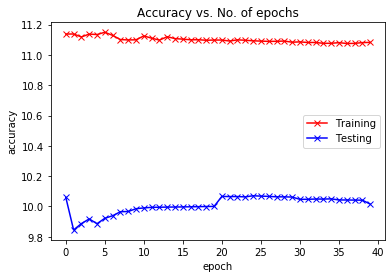

In [19]:
#a (experiment with only training label randomized and testing label not randomized)

import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [20]:
#b (experiment with only training label randomized and testing label not randomized)

print("Final training accuracy is : ",np.mean(train_accu) )

Final training accuracy is :  11.10075728264655


In [ ]:
#c
# As there only 10 possible labels , out of which 1 must be assigned to any input, 
# hence the expected accuracy of a random baseline model will be 10%

------------------------------
------------------------------
------------------------------

## <font color='blue'> Modifying the model for MNIST. </font>

Let's now work with the MNIST dataset. 
<br>

**a.** Prepare the dataloaders for the standard MNIST dataset.  <br>
**b.** Modify the model so that it works with the MNIST dataset. The inner array sizes should be roughly similar, but you can adjust them in the way you choose  <br>
**c.** Report the training and test accuracy after 10 epochs 





In [31]:


#a :

train_loader_MNIST = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))   ])),
  batch_size=64, shuffle=True)

test_loader_MNIST = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))   ])),
  batch_size=64, shuffle=True)

In [32]:
#b : 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)
        return pred

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)


In [33]:
#c


running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    

for epoch in range(10):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(train_loader_MNIST, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
       # print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            outputs = net(images)
                
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))

#print('Finished Training')

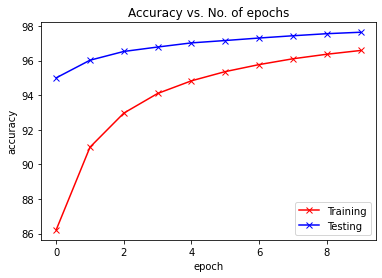

In [34]:
#c continues : 

import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [35]:
print("Final training accuracy is : ",np.mean(train_accu) )
print("Final testing accuracy is : ",np.mean(test_accu) )

Final training accuracy is :  93.92717539682539
Final testing accuracy is :  96.84364404761905


------------------------------
------------------------------
------------------------------

## <font color='blue'> MNIST on randomly permuted images. </font>

I will see whether a CNN remains as effective for randomly permuted images. 
<br>

**a.** Lets Find a way to randomly permute the entries of a 2d array in numpy or a 2d tensor in PyTorch. <br>
**b.** Train the model on a training set where the images in the training set have re-arranged in a **random** way, which however is the **same** across all images. <br>
**c.** Lets check the training and test accuracy after 10 epochs, and after 20 epochs.





In [25]:
#a , same method used for actual training and testing

trainset_example=torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))   ]))
train_loader_MNIST_example = torch.utils.data.DataLoader(trainset , batch_size=64, shuffle=True)



for i, data in enumerate(train_loader_MNIST_example,0):
    
    # Main code for a
    
    inputs, labels = data
    t=inputs
    print("Size before randomizing : ", t.size())
    print(t.data)
    idx = torch.randperm(t.nelement())
    t = t.view(-1)[idx].view(t.size())
    print("Size after randomizing : ", t.size())
    inputs=t
    print(t.data)
    if i==1:
        break

Size before randomizing :  torch.Size([64, 1, 28, 28])
tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ...,

In [29]:
trainset=torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))   ]))
train_loader_MNIST_rnd = torch.utils.data.DataLoader(trainset , batch_size=64, shuffle=True)
test_loader_MNIST = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))   ])),
  batch_size=64, shuffle=True)


In [30]:
#Defining the model again to avoid any prior memory

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)
        return pred

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)


In [31]:
#b and c (10 epochs)


running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
torch.manual_seed(0)    

for epoch in range(10):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(train_loader_MNIST_rnd, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        t=inputs
        #print(t.nelement())
        
        
        
        idx = torch.randperm(t.nelement())
        t = t.view(-1)[idx].view(t.size())
        #print("Size after randomizing : ", t.size())
        inputs=t
            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
       # print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            
            t=images
            idx = torch.randperm(t.nelement())
            t = t.view(-1)[idx].view(t.size())
            images=t
            
            outputs = net(images)
            
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))



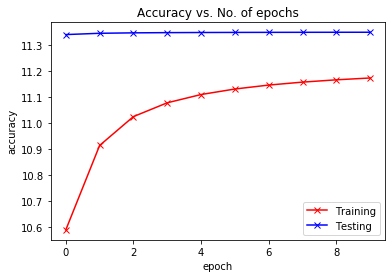

In [32]:
#b and c (10 epochs) continues: 

import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [33]:
#b and c (20 epochs)


running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    

for epoch in range(20):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(train_loader_MNIST_rnd, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        t=inputs
        #print(t.nelement())
        idx = torch.randperm(t.nelement())
        t = t.view(-1)[idx].view(t.size())
        #print("Size after randomizing : ", t.size())
        inputs=t
            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
       # print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            
            t=images
            idx = torch.randperm(t.nelement())
            t = t.view(-1)[idx].view(t.size())
            images=t
            
            outputs = net(images)
            
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))



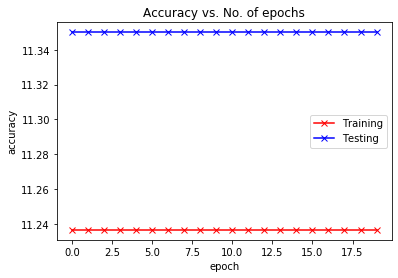

In [34]:
#c (20 epochs)


import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [35]:
#b and c (20 epochs) - Here I am experimenting without randomly permuting the test input


running_loss=0
loss=0
correct=0
total=0
running_loss_test=0
loss_test=0
correct_test=0
total_test=0
train_accu =[]
train_losses=[]
test_accu =[]
test_losses=[]
    

for epoch in range(20):  # loop over the dataset multiple times
    
        
    for i, data in enumerate(train_loader_MNIST_rnd, 0):
        temp_accu=[]
        temp_loss=[]
        running_loss = 0.0
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        t=inputs
        #print(t.nelement())
        idx = torch.randperm(t.nelement())
        t = t.view(-1)[idx].view(t.size())
        #print("Size after randomizing : ", t.size())
        inputs=t
            # zero the parameter gradients
        optimizer.zero_grad()
    
            # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
            # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
            #train_loss=running_loss/len(trainloader)
        accu=100.*correct/total
            #train_accu.append(accu)
            #train_losses.append(running_loss / 2000)
        temp_accu.append(accu)
        temp_loss.append( loss.item())
       # print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
           
            
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))
  
        #Test begins here
   
    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            
                       
            outputs = net(images)
            
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100
           
           
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))



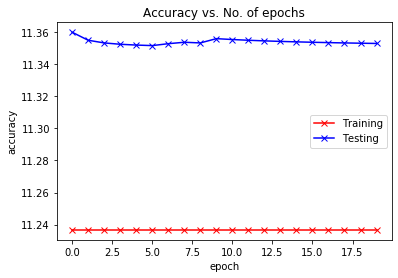

In [36]:
#c (20 epochs) [- Here I am experimenting without randomly permuting the test input]


import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');